In [48]:
import numpy
from keras.datasets import imdb
from matplotlib import pyplot

In [49]:
(X_train,y_train),(X_test,y_test) = imdb.load_data()

17465344/17464789 [==============================] - 20s 1us/step


In [50]:
X = numpy.concatenate((X_train,X_test),axis=0)
y = numpy.concatenate((y_train,y_test),axis=0)

In [51]:
print("Training data: ")
print(X.shape)
print(y.shape)

Training data: 
(50000,)
(50000,)


In [52]:
print("Classes: ")
print(numpy.unique(y))

Classes: 
[0 1]


In [53]:
print("Number of words: ")
print(len(numpy.unique(numpy.hstack(X))))

Number of words: 
88585


Review length: 
Mean 234.76 words (172.911495)


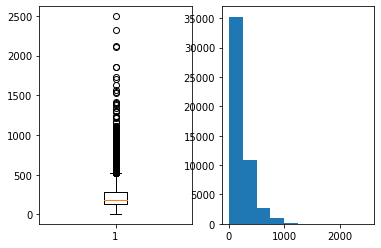

In [63]:
print("Review length: ")
result = map(len,X)
h = list(result)
print("Mean %.2f words (%f)" %(numpy.mean(h),numpy.std(h)))
pyplot.subplot(121)
pyplot.boxplot(h)
pyplot.subplot(122)
pyplot.hist(h)
pyplot.show()

In [61]:
list(result)

[]

In [64]:
# Simple multilayer perceptron model

In [65]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [66]:
seed = 7
numpy.random.seed(seed)

In [67]:
top_words = 5000
test_split=0.33
(X_train,y_train),(X_test,y_test) = imdb.load_data(nb_words=top_words)

/home/arvind/.local/lib/python3.6/site-packages/keras/datasets/imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '


In [69]:
max_words = 500
X_train = sequence.pad_sequences(X_train,maxlen=max_words)
X_test = sequence.pad_sequences(X_test,maxlen=max_words)

In [70]:
model = Sequential()
model.add(Embedding(top_words,32,input_length=max_words))
model.add(Flatten())
model.add(Dense(250,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss = "binary_crossentropy",optimizer = "adam",metrics=['accuracy'])
print(model.summary())

W0426 14:47:49.865401 140610536482624 deprecation.py:506] From /home/arvind/.local/lib/python3.6/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1633: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
W0426 14:47:50.497166 140610536482624 deprecation.py:323] From /home/arvind/.local/lib/python3.6/site-packages/tensorflow_core/python/ops/nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


In [71]:
model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 2,batch_size=128,verbose=1)

W0426 14:49:21.887778 140610536482624 deprecation.py:323] From /home/arvind/.local/lib/python3.6/site-packages/keras/optimizers.py:550: BaseResourceVariable.constraint (from tensorflow.python.ops.resource_variable_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Apply a constraint manually following the optimizer update step.
W0426 14:49:24.659198 140610536482624 module_wrapper.py:136] From /home/arvind/.local/lib/python3.6/site-packages/tensorflow_core/python/util/module_wrapper.py:163: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 20s 804us/step - loss: 0.4825 - accuracy: 0.7349 - val_loss: 0.2928 - val_accuracy: 0.8754
Epoch 2/2
25000/25000 [==============================] - 19s 777us/step - loss: 0.1727 - accuracy: 0.9341 - val_loss: 0.3192 - val_accuracy: 0.8660


In [72]:
scores = model.evaluate(X_test,y_test,verbose=0)

In [73]:
print("Accuracy: %.2f%%" %(scores[1]*100))

Accuracy: 86.60%


In [74]:
# 1D Convolutional neural networks

In [75]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [76]:
seed = 7
numpy.random.seed(seed)

In [77]:
model = Sequential()
model.add(Embedding(top_words,32,input_length=max_words))
model.add(Convolution1D(nb_filter=32,filter_length=3,padding='same',activation="relu"))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(250,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer = "adam",metrics=["accuracy"])
print(model.summary())

/home/arvind/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(padding="same", activation="relu", filters=32, kernel_size=3)`
  This is separate from the ipykernel package so we can avoid doing imports until
W0426 15:02:30.929549 140610536482624 module_wrapper.py:136] From /home/arvind/.local/lib/python3.6/site-packages/tensorflow_core/python/util/module_wrapper.py:163: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
____________________________________________

In [78]:
model.fit(X_train,y_train, validation_data = (X_test,y_test),epochs = 2,batch_size = 128,verbose=1)

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 20s 818us/step - loss: 0.4346 - accuracy: 0.7725 - val_loss: 0.2778 - val_accuracy: 0.8846
Epoch 2/2
25000/25000 [==============================] - 20s 799us/step - loss: 0.2079 - accuracy: 0.9180 - val_loss: 0.2954 - val_accuracy: 0.8763


In [79]:
scores = model.evaluate(X_test,y_test,verbose=0)

In [80]:
print("Accuracy: %.2f%%"%(scores[1]*100))

Accuracy: 87.63%
